## 신경망의 예

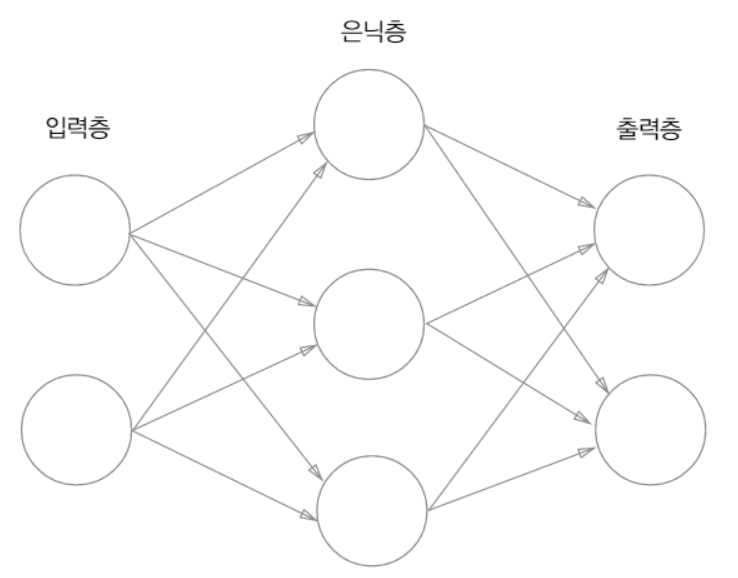

- 왼쪽부터 차례로 입력층, 은닉층, 출력층이라고 함.
- 은닉층의 뉴런은 입력층, 출력층과 달리 사람 눈에는 보이지 않음.
- 가중치를 갖는 층은 2개뿐이기 때문에 '2층 신경망'이라고 함.

## 활성화 함수
- 입력 신호의 총합을 출력 신호로 변화하는 함수를 일반적으로 활성화 함수(activation function)이라 함.

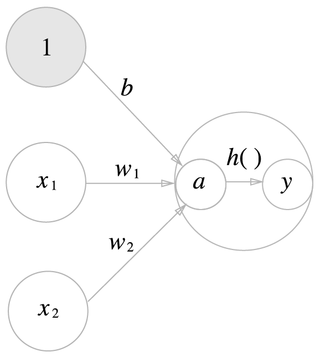

입계값을 경계로 출력이 바뀌는 함수를 계단 함수(step function)이라 함.

#### 시그모이드 함수

신경망에서 자주 이용하는 활성화 함수

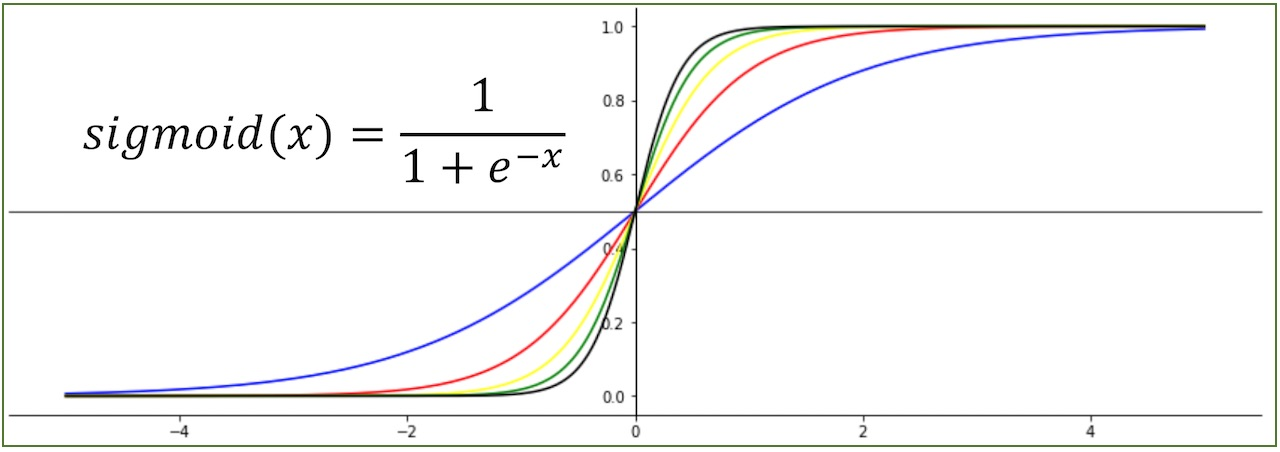

In [1]:
# 계단 함수 구현하기 - 입력이 0을 넘으면 1출력, 그 외에는 0 출력

# 기본형 - 실수만 받아들임. 배열 X
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

# 배열도 지원하도록 수정
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [2]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


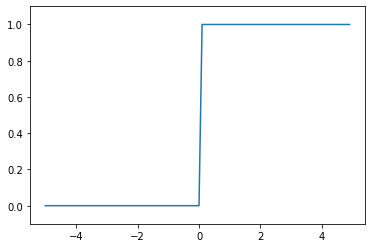

In [3]:
# 계단 함수의 그래프

import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [4]:
# 시그모이드 함수 구현하기

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

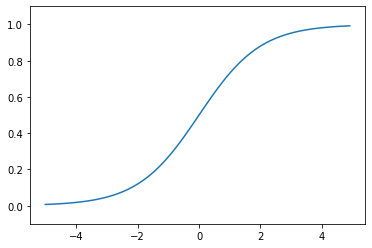

In [5]:
# 시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 계단함수, 시그모이드 함수 공통점

- 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조임.
- 비선형 함수임.

#### * 선형함수: 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수, f(x) = ax + b, 곧은 1개의 직성
####:  * 비선형함수: 직선 1개로는 그릴 수 없는 함수

## ReLU 함수

입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

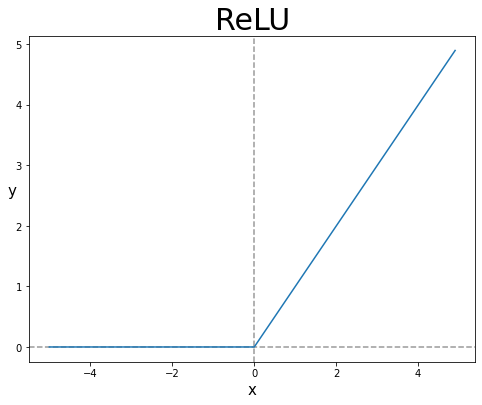

In [6]:
# ReLU 함수 구현
def relu(x):
  return np.maximum(0, x)

## 다차원 배열의 계산

넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있음.

In [7]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # 배열 차원 확인
print(A.shape)    # 배열 형상 확인
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [9]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [10]:
# 행렬의 곱

A = np.array([[1,2],[3,4]])
print(A.shape)

B = np.array([[5,6],[7,8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [12]:
# 2x3 , 3x2 행렬 곱
# A의 열 수와 B의 행 수가 같아야함.

A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
np.dot(A,B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

### 신경망에서의 행렬 곱

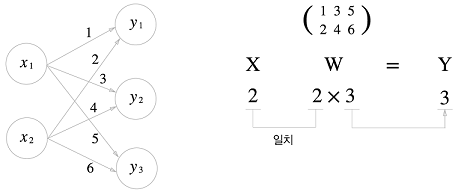

In [13]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기

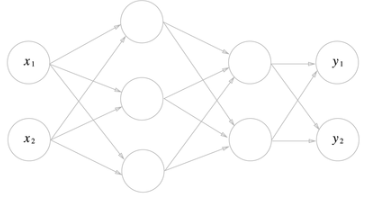

### 각 층의 신호 전달 구현하기

[입력층에서 1층으로 신호 전달]

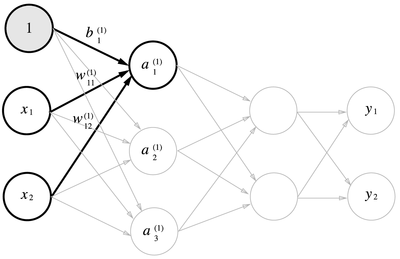

In [14]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3, 0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


[입력층에서 1층으로의 신호 전달]

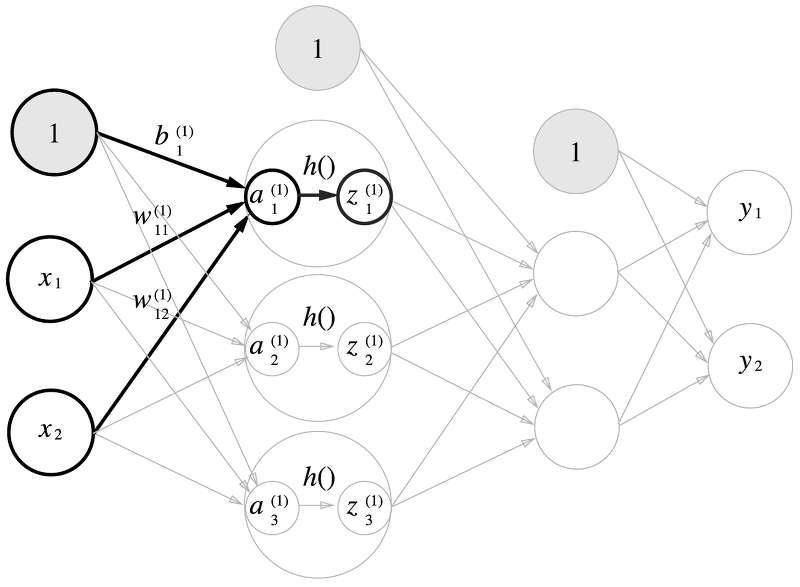

In [15]:
Z1 = sigmoid(A1)

print(A1)
print(Z1) # 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열 반환

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


[1층에서 2층으로의 신호 전달]

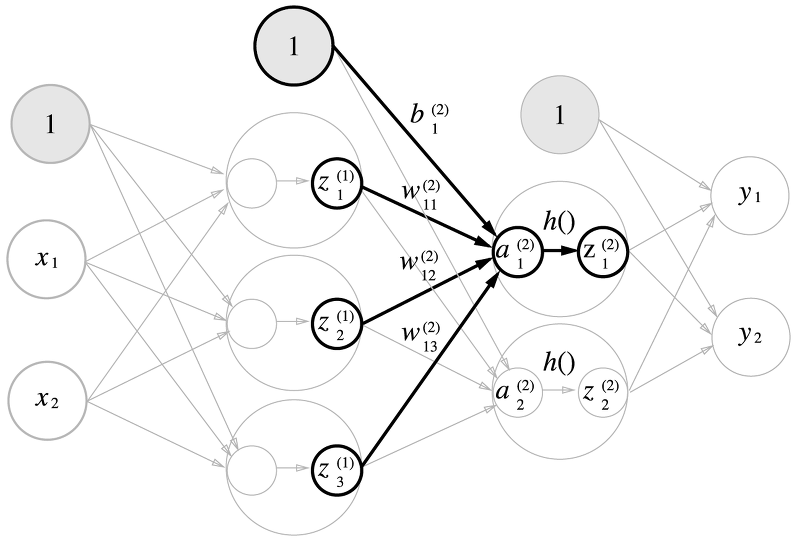

In [16]:
W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


[2층에서 출력층으로의 신호 전달]

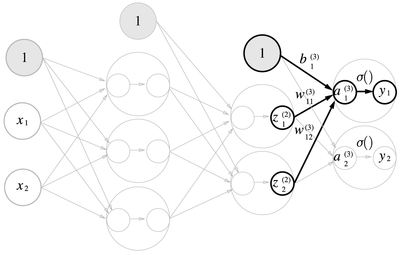

In [17]:
def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)

[0.31682708 0.69627909]


### 구현 정리

In [18]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기

- 신경망은 분류와 회귀 모두에 이용할 수 있음. 다만, 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐.
- 일반적으로 회귀에는 항등함수를, 분류에응 소프트맥스 함수를 사용함.

### 항등함수와 소프트맥스 함구 수형하기

- 항등함수는 입력을 그대로 출력, 입력과 출력이 항상 같다는 뜻의 항등

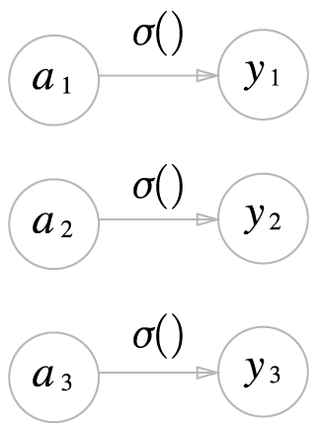

- 소프트 맥스

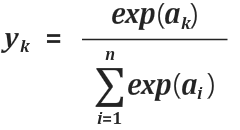

- exp(x)는 eⅹ을 뜻하는 지수함수 입니다. (e는 자연상수)
- n은 출력층의 뉴런 수, yk는 그 중 k번째 출력임을 뜻합니다.

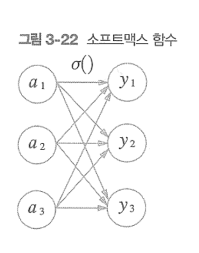

In [19]:
# 소프트 맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)   # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [20]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

- 지수함수는 큰 값을 내뱉기 때문에 계산시 오버플로가 일어나고 , inf로 돌아옴. 이런 큰 값끼리 나눗셈을 하면 결과 수치라 불안정해짐.
- 오버 플로를 막는 목적으로 C라는 임의의 정수를 분자와 분모에 곱하고, 지수 함수 exp() 안으로 옮겨 logC를 만듦.

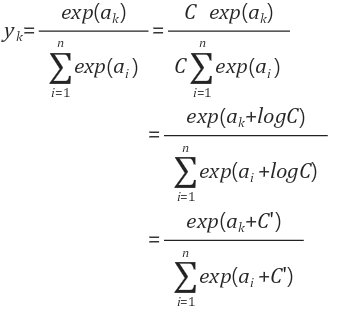

In [21]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))    # 소프트 함수의 계산 제대로 되지 않음.

[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [22]:
a = np.array([1010, 1000, 990])
c = np.max(a)
print(a - c)
print(np.exp(a - c) / np.sum(np.exp(a - c)))    # 제대로 계산됨

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [23]:
# 함수 보완 
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)   # 오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

### 소프트맥스 함수의 특징

- 0에서 1.0 사이의 실수
- 소프트맥스 함수 출력의 총합은 1임.  즉 소프트맥스 함수 출력을 '확률'로 해석할 수 있음.

In [24]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

## 손글씨 숫자 인식

In [25]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝


In [26]:
# MNIST 데이터셋

import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from mnist import load_mnist

# 처음 한 번은 몇 분 정도 소요
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상출력
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [28]:
# 이미지 샘플 불러오기

import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)    # flatten= True는 1차원 배열로 저장

img = x_train[0]
label = y_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)   # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [29]:
# 신경망 추론 정리
import pickle

def get_data():
  (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, y_test

def init_network():
  with open('sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [30]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])    # 각 레이블의 확률을 넘파이배열로 변환
  p = np.argmax(y)              # 확률이 가장 높은 원소의 인덱스를 얻는다.
  if p == t[i]:
    accuracy_cnt += 1

print(f'Accuracy: {float(accuracy_cnt) / len(x)}')

Accuracy: 0.9352


In [31]:
# 배치처리
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


[신경망 각 층의 배열 형상의 추이]

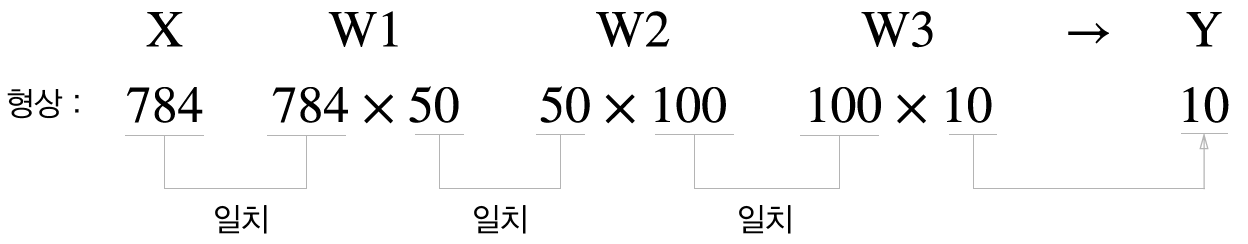

이처럼 하나로 묶은 입력 데이터를 배치라고 함.

- 배치 처리는 컴퓨터로 계산할 때 큰 이점을 줌.
- 이미지 1장당 처리 시간을 대폭 줄여줌.
  - 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화 되어있음.
  - 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄임.(느린 I/O를 통해 데이터를 읽는 횟ㅅ가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐.)

In [32]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100      # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f'Accuracy: {float(accuracy_cnt) / len(x)}')

Accuracy: 0.9352


## 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- numpy의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하여, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.